In [1]:
%cd /Users/monica_air/Documents/GitHub/Sign_recognition/py
from basic_preprocessing import *
from deeplearning_check import *
from machine_learning import *
from FINAL_IMG_PREP import *
from video_info import *

gpu_check()
set_global_determinism(seed=SEED)

%cd /Users/monica_air/Documents/CCTV/key_point

/Users/monica_air/Documents/GitHub/Sign_recognition/py
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5788233181073157053
xla_global_id: -1
]
tf 2.9.2
keras 2.9.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
/Users/monica_air/Documents/CCTV/key_point


In [2]:
# import tensorflow as tf
import tensorflow_hub as hub

In [3]:
# Optional if you are using a GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
model =hub.load('https://tfhub.dev/google/movenet/multipose/lightning/1')
movenet = model.signatures['serving_default']

In [5]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 6, (0,255,0), -1)
            
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
            
#function to loop through each person detected and render

def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

### Image test

In [ ]:
print((min(kx_list)-10, min(ky_list)-50), (max(kx_list)+10, max(ky_list)+50)) 
(1872, 418) (1892, 518)

In [ ]:
org_frame = cv2.imread('/Users/monica_air/Documents/CCTV/test_dataset/test_img.png', cv2.IMREAD_COLOR)
# show(org_frame)
trim = org_frame[418:518, 1872:1892]
print(trim.shape)
show(trim)

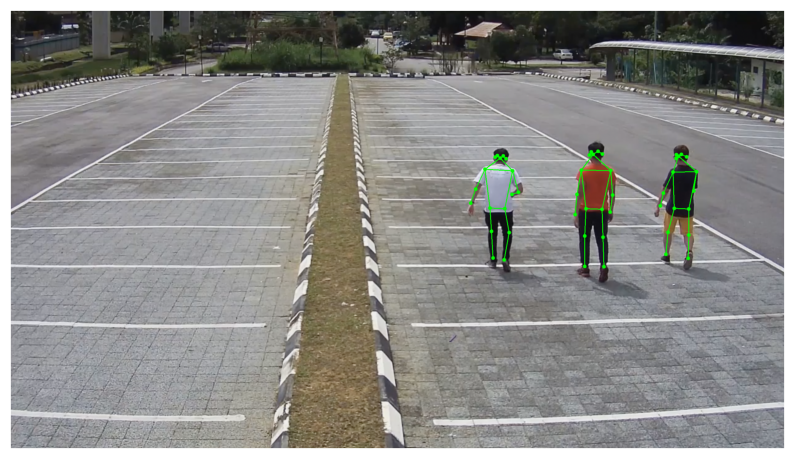

In [107]:
frame = cv2.imread('/Users/monica_air/Documents/CCTV/test_dataset/test_img.png', cv2.IMREAD_COLOR)
img = frame.copy()
            # show(img)
            ## 사이즈 모델이 32의 배수여야하고 256pixel이상이여야함
            ### ratio 따라서 reshape해야함 
img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 352,608)
input_img = tf.cast(img, dtype=tf.int32)
        #
            # Detection section
results = movenet(input_img)

            #rendering
keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
            
            # Render keypoints 
loop_through_people(frame, keypoints_with_scores, EDGES, 0.3)
show(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))            

6


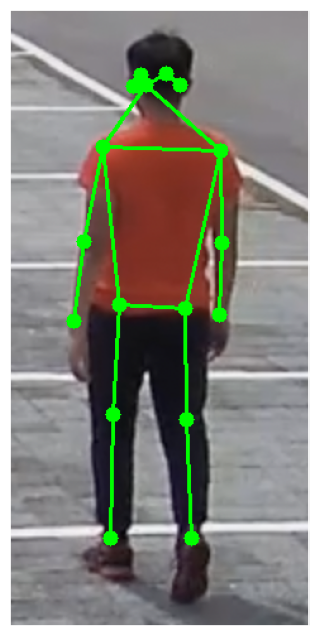

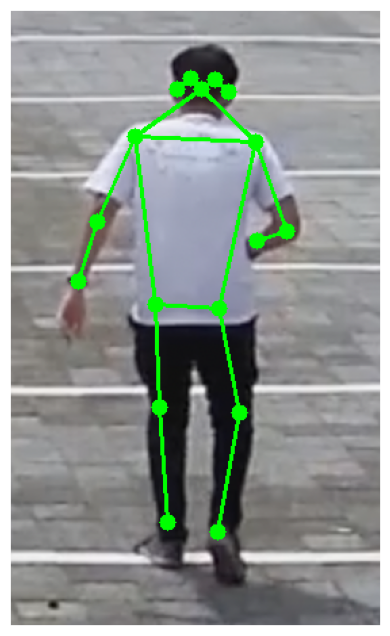

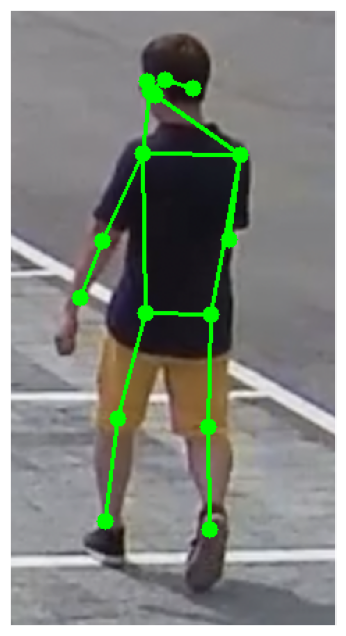

In [105]:
org_frame = cv2.imread('/Users/monica_air/Documents/CCTV/test_dataset/test_img.png', cv2.IMREAD_COLOR)
frame = org_frame.copy()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
img = org_frame.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
confidence_threshold = 0.3
y, x, c = frame.shape
            # show(img)
            ## 사이즈 모델이 32의 배수여야하고 256pixel이상이여야함
            ### ratio 따라서 reshape해야함 
img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 352,608)
input_img = tf.cast(img, dtype=tf.int32)
        #
            # Detection section
results = movenet(input_img)

            #rendering
keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))

print(len(keypoints_with_scores))
for i in keypoints_with_scores:
    shaped = np.squeeze(np.multiply(i, [y,x,1]))
    ky_list = []
    kx_list = []
    result_list = []
    for kp in shaped: ## 사람 머리부터 다 나옴 
        ky, kx, kp_conf = kp
        # print(len(kp))
        if kp_conf > confidence_threshold:
            ky_list.append(int(ky))
            kx_list.append(int(kx))
            loop_through_people(frame, keypoints_with_scores, EDGES, 0.3)
            # draw_img = frame.copy()
            # # print(draw_img.shape)
            # draw_img = cv2.rectangle(draw_img,((min(kx_list)-50, min(ky_list)-70)), (((max(kx_list)+70, max(ky_list)+70))), (255,255,0),3 )
           
    try:
        trim_org = frame.copy()
        trim=trim_org[min(ky_list)-50:max(ky_list)+70,min(kx_list)-50:max(kx_list)+70 ]
        show(trim)
    except:
        pass

released
